In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import sys, os
import h5py
import torch.utils.data as utils
from torch.utils.data.sampler import SubsetRandomSampler
import random
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import sklearn.metrics as skm
from torchvision import models

torch.cuda.set_device(1)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# model name
with torch.no_grad():
    model = torch.load("ori_set_RT.pt")
    model.cuda()
print ('# of parameters: ', count_parameters(model))
print(model)


/home/xueyuan/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# of parameters:  202328
RT(
  (encoder): Linear(in_features=2, out_features=64, bias=True)
  (rt): RTransformer(
    (forward_net): Sequential(
      (0): Block(
        (layers): ModuleList(
          (0): LocalRNNLayer(
            (local_rnn): LocalRNN(
              (rnn): LSTM(64, 64, batch_first=True)
            )
            (connection): SublayerConnection(
              (norm): LayerNorm()
              (dropout): Dropout(p=0.001, inplace=False)
            )
          )
          (1): LocalRNNLayer(
            (local_rnn): LocalRNN(
              (rnn): LSTM(64, 64, batch_first=True)
            )
            (connection): SublayerConnection(
              (norm): LayerNorm()
              (dropout): Dropout(p=0.001, inplace=False)
            )
          )
        )
        (connections): ModuleList(
          (0): SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.001, inplace=False)
          )
          (1): SublayerConnection(
     

In [2]:
mod_type = ['OOK','4ASK','8ASK','BPSK','QPSK','8PSK','16PSK','32PSK','16APSK','32APSK',  
          '64APSK','128APSK','16QAM','32QAM','64QAM','128QAM','256QAM','AM-SSB-WC',
          'AM-SSB-SC','AM-DSB-WC','AM-DSB-SC','FM','GMSK','OQPSK']

In [3]:
# load test set data.
x = h5py.File("../../dataset/201801a_data_test.h5", 'r+')
x = np.asarray(x['test'])
part = x.shape[0] // 24
x = x[(part-6)::part,:,:]
print (x.shape)

x = torch.from_numpy(x).cuda()
output = model(x)
_, predicted = torch.max(output.data, 1)
print (predicted)


(24, 1024, 2)
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 14, 17,
        18, 19, 20, 21, 22, 23], device='cuda:1')


## each layer analysis.

In [4]:
inp = x
x = model.encoder(inp)
#print ('encod', x)
x1 = x.detach().cpu().numpy()
x = model.rt.forward_net[0].layers[0](x)
x = model.rt.forward_net[0].layers[1](x)
#print ('lstm 2', x)
x2 = x.detach().cpu().numpy()
x = model.rt.forward_net[0].connections[0](x, model.rt.forward_net[0].pooling)
#print ('pooling', x)
x3 = x.detach().cpu().numpy()
x = model.rt.forward_net[0].connections[1](x, model.rt.forward_net[0].feed_forward)

x = model.rt.forward_net[1].layers[0](x)
x = model.rt.forward_net[1].layers[1](x)
#print ('lstm 2', x)
x4 = x.detach().cpu().numpy()
x = model.rt.forward_net[1].connections[0](x, model.rt.forward_net[1].pooling)
#print ('pooling', x)
x5 = x.detach().cpu().numpy()
x = model.rt.forward_net[1].connections[1](x, model.rt.forward_net[1].feed_forward)
x6 = x.detach().cpu().numpy()
x = x.transpose(-2,-1)
x = model.linear(x[:,:,-1])
# check outputs are same.
#print ('linear out', F.log_softmax(x, dim=1))
#print ('check if right', output)

output of encoder


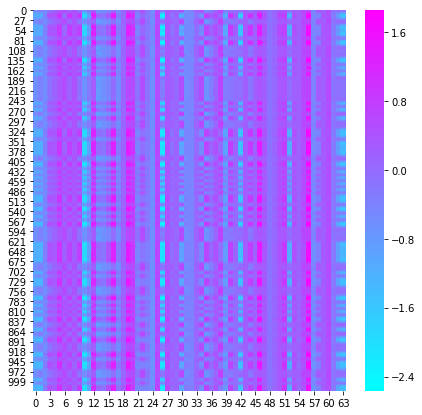

after two lstm


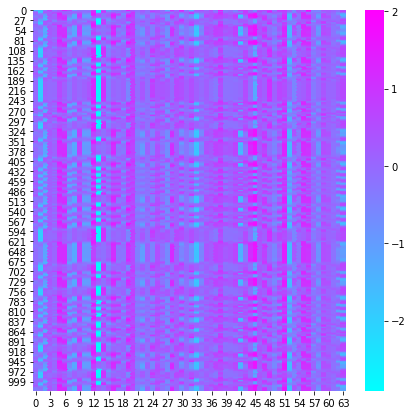

after attention


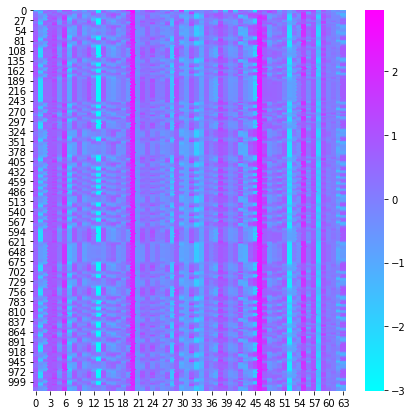

after ff and 2 lstm


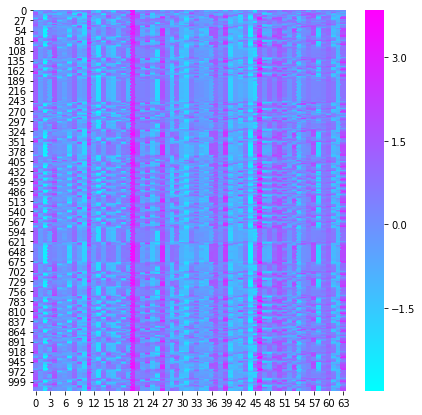

after attention


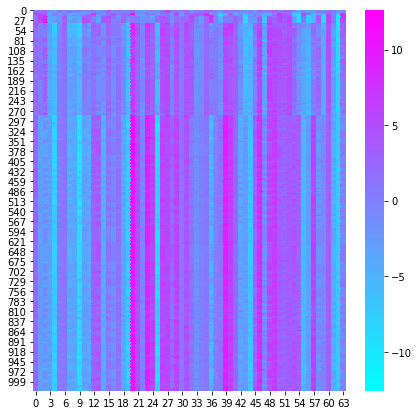

after final ff


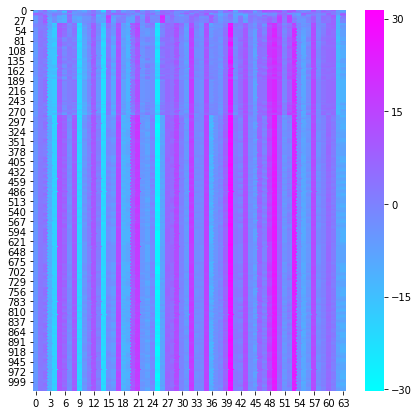

In [5]:
# size: bs, 1024, 64
mod = 0
def prt(mat):
    plt.figure(figsize = (7,7))
    sn.heatmap(mat, cmap="cool")
    plt.show()
    
print ('output of encoder')
prt(x1[mod, :, :])
print ('after two lstm')
prt(x2[mod, :, :])
print ('after attention')
prt(x3[mod, :, :])
print ('after ff and 2 lstm')
prt(x4[mod, :, :])
print ('after attention')
prt(x5[mod, :, :])
print ('after final ff')
prt(x6[mod, :, :])

output of encoder


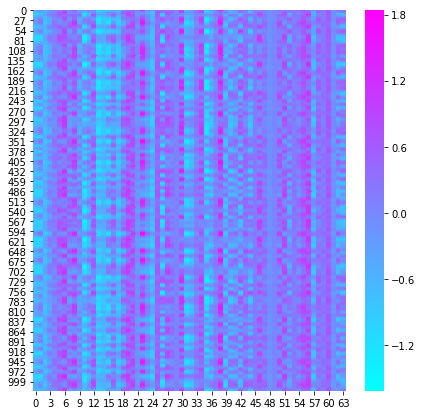

after two lstm


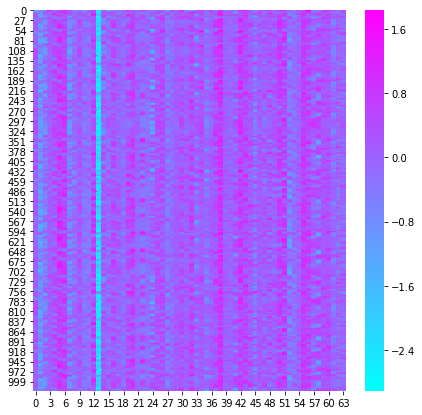

after attention


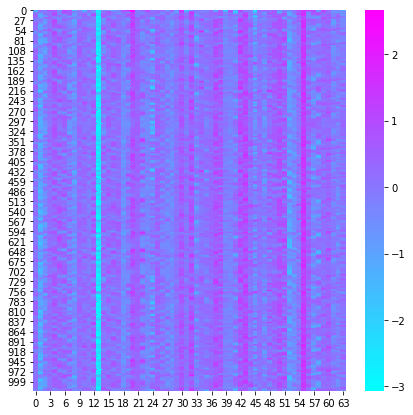

after ff and 2 lstm


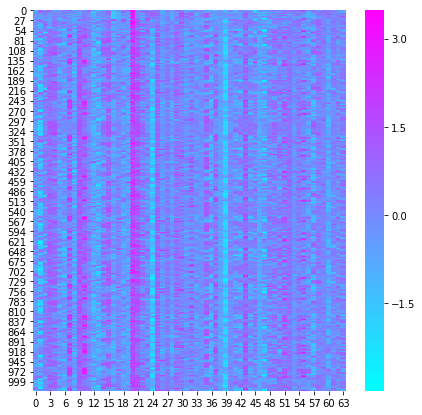

after attention


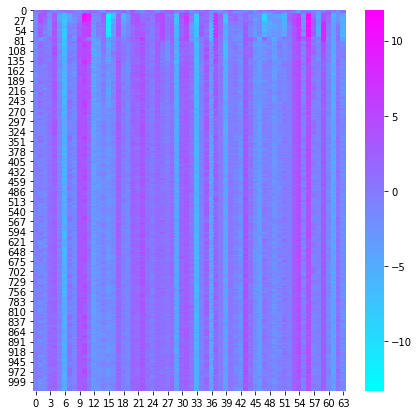

after final ff


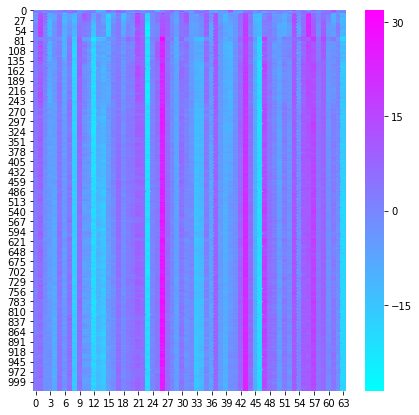

In [6]:
# size: 24, 1024, 64
mod = 5

print ('output of encoder')
prt(x1[mod, :, :])
print ('after two lstm')
prt(x2[mod, :, :])
print ('after attention')
prt(x3[mod, :, :])
print ('after ff and 2 lstm')
prt(x4[mod, :, :])
print ('after attention')
prt(x5[mod, :, :])
print ('after final ff')
prt(x6[mod, :, :])

output of encoder


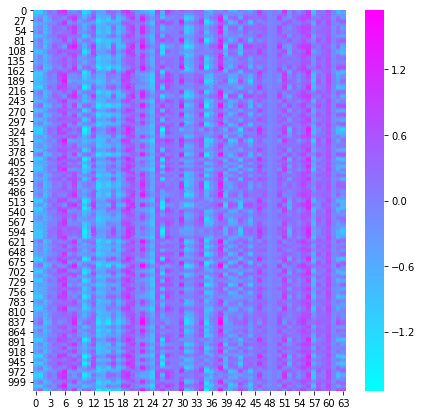

after two lstm


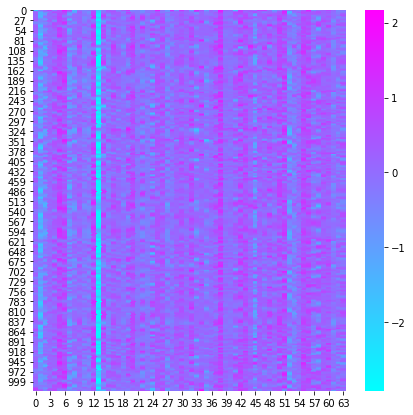

after attention


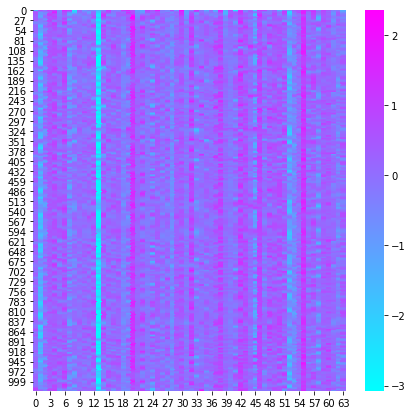

after ff and 2 lstm


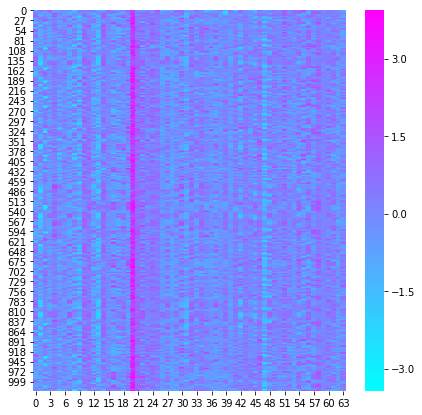

after attention


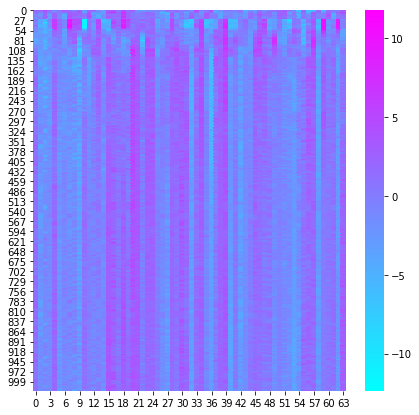

after final ff


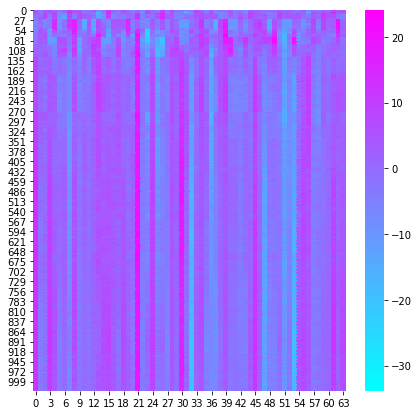

In [7]:
# size: 24, 1024, 64
mod = 14

print ('output of encoder')
prt(x1[mod, :, :])
print ('after two lstm')
prt(x2[mod, :, :])
print ('after attention')
prt(x3[mod, :, :])
print ('after ff and 2 lstm')
prt(x4[mod, :, :])
print ('after attention')
prt(x5[mod, :, :])
print ('after final ff')
prt(x6[mod, :, :])

output of encoder


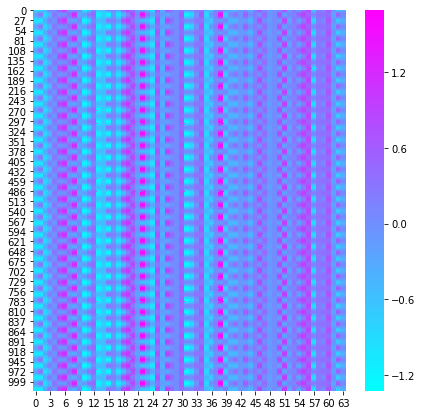

after two lstm


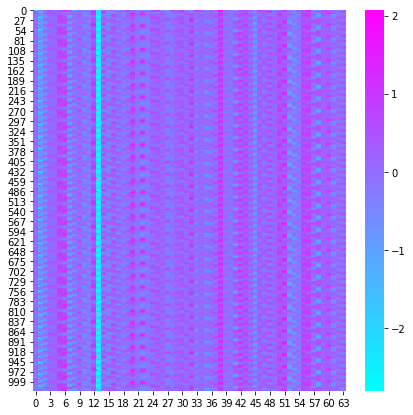

after attention


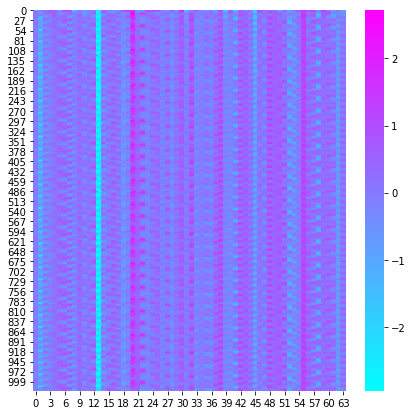

after ff and 2 lstm


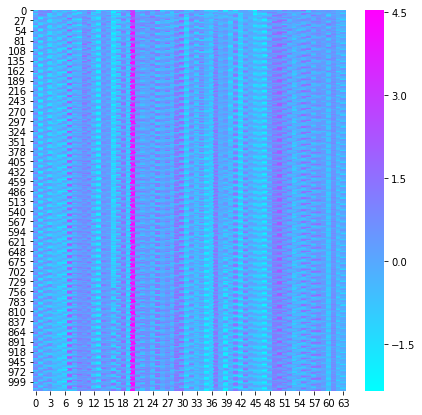

after attention


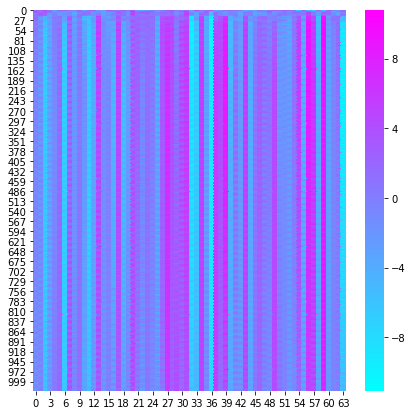

after final ff


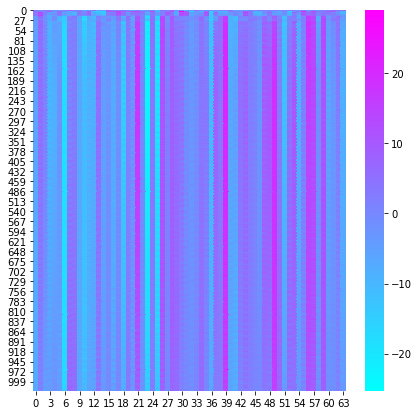

In [8]:
# size: 24, 1024, 64
mod = 20

print ('output of encoder')
prt(x1[mod, :, :])
print ('after two lstm')
prt(x2[mod, :, :])
print ('after attention')
prt(x3[mod, :, :])
print ('after ff and 2 lstm')
prt(x4[mod, :, :])
print ('after attention')
prt(x5[mod, :, :])
print ('after final ff')
prt(x6[mod, :, :])

## others.